## Model Building

## Creating a logistic regression to predict absenteeism

## Import the relevant libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

### Load the Data

In [87]:
data_preprocessed = pd.read_csv("Preprocessed.csv")

In [88]:
data_preprocessed.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


### Create the target variable

In [89]:
data_preprocessed["Absenteeism Time in Hours"].median()

3.0

#### 3 is our threshold that separates our target variable  

We create two target variable which are **Moderately Absent** and **Excessively Absent**

In [90]:
targets = np.where(data_preprocessed["Absenteeism Time in Hours"] > 3, 1, 0)

In [91]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [92]:
data_preprocessed["Excessive Absenteeism"] = targets

In [93]:
data_preprocessed.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


#### Checking data if it is  balance

In [94]:
round(data_preprocessed["Excessive Absenteeism"].sum() / data_preprocessed["Excessive Absenteeism"].shape[0],2)

0.46

- #### % 46 of the target is 1  it is a good sign for balanced data

In [95]:
data_with_target = data_preprocessed.drop(["Absenteeism Time in Hours"],axis = 1)

In [96]:
data_with_target is data_preprocessed

False

In [97]:
data_with_target.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


### Train-Test Split

In [98]:
X = data_with_target.drop('Excessive Absenteeism',axis=1) # independent variables
y = data_with_target['Excessive Absenteeism'] # dependent variables

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Standardize the Data

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()

In [103]:
#### Before we scale the data we need to seperate dummy variables from dataset

In [70]:
X_train.columns

Index(['reason_1', 'reason_2', 'reason_3', 'reason_4', 'Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets'],
      dtype='object')

In [104]:
X_train

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
82,1,0,0,0,11,3,179,51,38,306.345,31,0,0,0
51,0,0,0,0,9,0,225,26,28,241.476,24,0,1,2
220,0,0,1,0,6,0,246,25,41,377.550,23,0,0,0
669,0,0,0,1,4,4,179,26,30,246.288,19,1,0,0
545,0,0,0,1,11,0,118,10,37,268.519,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,1,10,3,291,31,40,253.465,25,0,1,1
106,0,0,0,1,12,3,225,26,28,261.306,24,0,1,2
270,1,0,0,0,9,0,179,51,38,294.217,31,0,0,0
435,0,0,0,1,5,2,225,26,28,246.074,24,0,1,2


In [105]:
columns_to_scale = ['Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index']

In [106]:
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

In [107]:
X_train

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
82,1,0,0,0,0.909091,0.500000,0.225926,0.978723,0.354839,0.580619,0.631579,0,0,0
51,0,0,0,0,0.727273,0.000000,0.396296,0.446809,0.032258,0.205583,0.263158,0,1,2
220,0,0,1,0,0.454545,0.000000,0.474074,0.425532,0.451613,0.992288,0.210526,0,0,0
669,0,0,0,1,0.272727,0.666667,0.225926,0.446809,0.096774,0.233403,0.000000,1,0,0
545,0,0,0,1,0.909091,0.000000,0.000000,0.106383,0.322581,0.361930,0.473684,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,1,0.818182,0.500000,0.640741,0.553191,0.419355,0.274896,0.315789,0,1,1
106,0,0,0,1,1.000000,0.500000,0.396296,0.446809,0.032258,0.320229,0.263158,0,1,2
270,1,0,0,0,0.727273,0.000000,0.225926,0.978723,0.354839,0.510502,0.631579,0,0,0
435,0,0,0,1,0.363636,0.333333,0.396296,0.446809,0.032258,0.232166,0.263158,0,1,2


In [108]:
X_test[columns_to_scale] = scaler.fit_transform(X_test[columns_to_scale])

In [109]:
X_test

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
158,0,1,0,0,0.181818,0.166667,0.225926,0.285714,0.565217,0.794001,0.157895,1,2,0
500,0,0,0,1,0.727273,0.666667,0.225926,0.380952,0.130435,0.322830,0.000000,1,0,0
396,0,0,0,1,0.181818,0.166667,0.225926,0.285714,0.565217,0.222412,0.157895,1,2,0
155,0,0,0,1,0.181818,0.166667,0.640741,0.952381,0.217391,0.794001,0.210526,0,0,0
321,0,0,0,1,0.909091,0.000000,0.640741,0.500000,0.565217,0.451612,0.315789,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,0,1,0,0.636364,0.000000,0.633333,0.619048,0.260870,0.000000,0.578947,0,2,1
218,1,0,0,0,0.363636,0.333333,0.000000,0.071429,1.000000,1.000000,0.631579,0,1,0
431,0,0,0,1,0.363636,0.666667,0.525926,0.952381,0.391304,0.232166,0.210526,0,4,0
281,0,0,0,1,0.727273,0.666667,0.640741,0.500000,0.565217,0.510502,0.315789,0,1,1


### Model Building

In [110]:
from sklearn.linear_model import LogisticRegression

In [112]:
lr = LogisticRegression()

In [114]:
lr.fit(X_train,y_train)

LogisticRegression()

In [116]:
y_pred_lr= lr.predict(X_test)

In [117]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [118]:
print('Accuracy Score is {:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy Score is 0.78


In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        82
           1       0.75      0.69      0.72        58

    accuracy                           0.78       140
   macro avg       0.77      0.77      0.77       140
weighted avg       0.78      0.78      0.78       140



<AxesSubplot:>

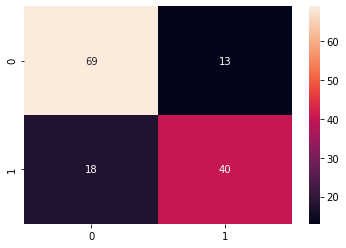

In [120]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True )

### Random Forest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf = RandomForestClassifier()

In [125]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [127]:
y_pred_rf = rf.predict(X_test)

In [129]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        82
           1       0.72      0.71      0.71        58

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.76      0.76      0.76       140



<AxesSubplot:>

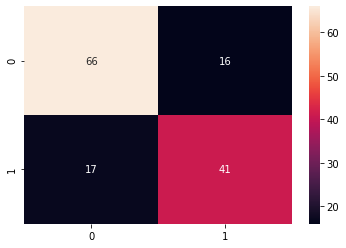

In [128]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot = True )

### XGBoost Classifier

In [131]:
from xgboost import XGBClassifier

In [210]:
xgb = XGBClassifier(learning_rate=0.01,random_state=3)

In [211]:
xgb.fit(X_train,y_train)

[23:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [212]:
y_pred_xgb = xgb.predict(X_test)

<AxesSubplot:>

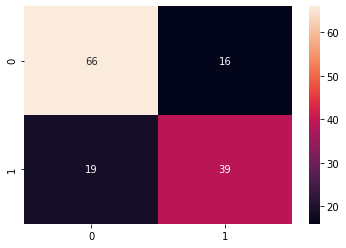

In [213]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot =True )

In [161]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        82
           1       0.75      0.72      0.74        58

    accuracy                           0.79       140
   macro avg       0.78      0.78      0.78       140
weighted avg       0.78      0.79      0.79       140



### Conclusion

There are 3 models built for our dataset. Best performing model is **XGBoost with 0.79 f1-score**